# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, pow
from statistics import mean
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Question 1

## A
Read the data provided on canvas into Python   
Print the first 5 rows of each dataset to inspect the nature odataa


In [2]:
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

In [3]:
delivery_train.head()

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [4]:
delivery_test.head()

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [5]:
student_train.head()

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [6]:
student_test.head()

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


## B
Split the data into training and test set as follows (described in document).  
Print the shape of input and output data for the training and test sets.  

In [7]:
X_delivery_train = delivery_train[["Miles","Deliveries"]]
y_delivery_train = delivery_train["Time"]

X_delivery_test = delivery_test[["Miles","Deliveries"]]
y_delivery_test = delivery_test["Time"]

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train["Dropped"]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test["Dropped"]

In [8]:
print("X_delivery_train: {}".format(X_delivery_train.shape))
print("y_delivery_train: {}".format(y_delivery_train.shape))
print("X_delivery_test: {}".format(X_delivery_test.shape))
print("y_delivery_test: {}".format(y_delivery_test.shape))
print("X_student_train: {}".format(X_student_train.shape))
print("y_student_train: {}".format(y_student_train.shape))
print("X_student_test: {}".format(X_student_test.shape))
print("y_student_test: {}".format(y_student_test.shape))

X_delivery_train: (199, 2)
y_delivery_train: (199,)
X_delivery_test: (101, 2)
y_delivery_test: (101,)
X_student_train: (400, 2)
y_student_train: (400,)
X_student_test: (100, 2)
y_student_test: (100,)


## C
You would use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. You would write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances. The input that the function takes include:  * 	X_train: Pandas DataFrame or 2D NumPy arra
* 	 y_train: Pandas Series or 1D NumPy arr
* 
•	X_test: Pandas DataFrame or 2D NumPy ar
* 
•	K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function c

ll. 
Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo (provided in document)  code:
 
Call the knn_predict() function and pass the X_delivery_train, y_delivery_train and X_delivery_test to compute the predicted output values for the X_delivery_test set. You can reference the results using a variable, y_delivery_testpred. 


In [9]:
def knn_predict(X_train, y_train, X_test, k = 5):
    y_pred = []
    for i in range(0, len(X_test)):
        # grab a test instance from X_test data
        test_instance = X_test.iloc[i]
        # find distances between the test instance and all the training instances
        distances = []
        for j in range(0, len(X_train)):
            distances.append( sqrt( pow(X_train.iloc[j].Miles - test_instance.Miles, 2) + pow(X_train.iloc[j].Deliveries - test_instance.Deliveries, 2) ) )
        # stack the distances with the y_train to get a matrix
        temp_df = y_train.to_frame().copy()
        temp_df["Distances"] = distances
        # sort the matrix by the distance column
        temp_df = temp_df.sort_values(by = ["Distances"])
        # pick k number of y_train values where k is much less than the length of the training set
        subset = temp_df.head(n=k)
        # make a prediction for the test instance
        y_pred.append( subset["Time"].mean() )
    return y_pred

In [10]:
y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k=5)

## D
Write a function that computes the mean squared error to measure the performance accuracy of your knn algorithm. The input that goes into the function is the actual output values(y) and the predicted output values (y_pred). The mean squared error (mse) is calculated as follows (described in the document).  
You can name the function mse. Then call the function to compute the mse for the test set for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred). 

In [11]:
def mse(y, y_pred):
    return sum((y.sub(y_pred))**2)/len(y)

In [12]:
mse_test_pred = mse(y_delivery_test, y_delivery_test_pred)
mse_test_pred

1.0977544554455447

## E
Does your algorithm overfit the data?  
To answer this question, you need to compute the accuracy or mse of the algorithm on the training set, and compare with the accuracy or mse you got for the test set.  
You will need to start with making predictions for the training set.  
Note that you will need to pass the training set into the X_test parameter of the knn_predict() function, in addition to the other arguments of the function.  
When you get the predicted values for the training set, use the mse() function to get the training mse. 

In [13]:
y_delivery_train_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k=5)
mse_train_pred = mse(y_delivery_train ,y_delivery_train_pred)

In [14]:
mse_test_pred

1.0977544554455447

In [15]:
mse_train_pred

0.5889105527638189

It can be seen that the MSE for the test dataset is almost double that of the MSE for the training dataset, which could indicate an overfitting.  
I would consider that this algorithm is overfitted. 

## F
Now, tune the hyperparameter, k, of your algorithm.  
Specify a grid of hyperparameter values from k=1 to k=50.  
Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid.  
Plot the training and test error rates of the model versus the grid of hyperparameter values. 

In [16]:
# Creating the array of possible k values
k_values = [x for x in range(1,51)]

In [17]:
training_accuracies = []
test_accuracies = []
for i in k_values:
    y_delivery_train_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k=i)
    mse_train_pred = mse(y_delivery_train ,y_delivery_train_pred)
    training_accuracies.append(mse_train_pred)
    y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k=i)
    mse_test_pred = mse(y_delivery_test, y_delivery_test_pred)
    test_accuracies.append(mse_test_pred)

In [18]:
training_accuracies

[0.88,
 0.5410552763819096,
 0.49016192071468423,
 0.5442273869346734,
 0.5889105527638189,
 0.6678168620882184,
 0.7515075376884417,
 0.8535309359296478,
 0.9333333333333336,
 0.9433728643216084,
 0.9892723950330161,
 1.063175251256281,
 1.1081237548690188,
 1.1586068095579944,
 1.2040987158012286,
 1.2451576240577884,
 1.2963135747943875,
 1.326973602580805,
 1.3562358885841947,
 1.3800853015075372,
 1.3670159185952433,
 1.3809035881888774,
 1.3663880840877347,
 1.3439535350362928,
 1.3183068140703513,
 1.3099962088549257,
 1.3016817282571982,
 1.2982083247872007,
 1.3101437030574987,
 1.3320417643774431,
 1.3397373966607236,
 1.3543011443938442,
 1.3424396546552786,
 1.3415137104206156,
 1.355265142036714,
 1.358662835783858,
 1.37926586915586,
 1.4030964030679718,
 1.4172129549787054,
 1.421693655778895,
 1.4186228285986757,
 1.418910111783407,
 1.412020160293082,
 1.4228795319573069,
 1.4413526645573544,
 1.4611664893465441,
 1.4888271825401331,
 1.5283671831379106,
 1.56284646891

In [19]:
test_accuracies

[1.3307920792079215,
 1.042574257425743,
 1.0226292629262923,
 1.086788366336634,
 1.0977544554455447,
 1.1408608360836086,
 1.2202121640735504,
 1.3375634282178215,
 1.4471458256936798,
 1.4765990099009896,
 1.4933172408149893,
 1.6075110011001104,
 1.618517194914757,
 1.6386017377247928,
 1.5929610561056096,
 1.5804625618811883,
 1.545844324916921,
 1.5786166116611668,
 1.5832324949946528,
 1.599380445544554,
 1.608479827574594,
 1.6303414205056865,
 1.6228508862228377,
 1.623166597909791,
 1.6118889504950498,
 1.6171193391528498,
 1.6185610289424002,
 1.6448652505556676,
 1.6546446356883004,
 1.686806820682068,
 1.7027826830549868,
 1.7311443185334163,
 1.7462562619898356,
 1.7490767926273605,
 1.767230551626592,
 1.7802110072118327,
 1.788728493010003,
 1.8166132305751355,
 1.83738421179396,
 1.847279455445544,
 1.8402148061326067,
 1.8445813407871396,
 1.8477494390866873,
 1.8676629878896989,
 1.8939307664099745,
 1.9225230212057123,
 1.970238762219364,
 2.0064805503987904,
 2.041

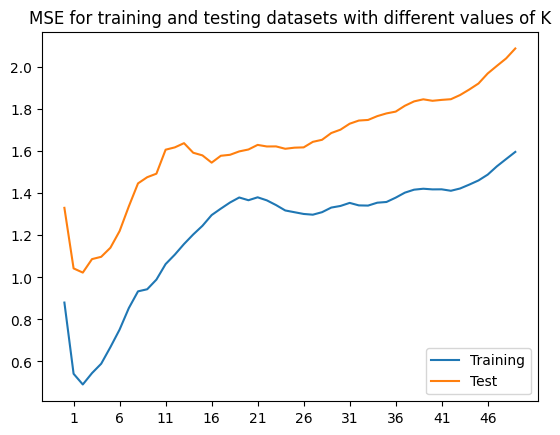

In [20]:
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(range(1,len(k_values)+1, 5))  # Set label locations.
plt.plot(training_accuracies)
plt.plot(test_accuracies)
plt.legend(["Training", "Test"], loc="lower right")
plt.title("MSE for training and testing datasets with different values of K")
plt.show()

It can be seen that the lowest error rate was when k = 3

In [21]:
min(training_accuracies)

0.49016192071468423

In [22]:
min(test_accuracies)

1.0226292629262923

## G
Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module.  
Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set.  
Is this similar to the mse value you got from the algorithm function you wrote from scratch? 

In [23]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_delivery_train, y_delivery_train)
knn_pred = knn.predict(X_delivery_test)
mean_squared_error(y_delivery_test, knn_pred)

1.0033993399339933

The results using the sklearn function is a lower error than with the best results for our model. However, the difference is not that large. 

## H
Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline().  
Then the call the fit() method on the pipeline object to fit the model into the delivery training data.  
Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error () function inside the sklearn.metrics module to compute the mse of the model on the test set.  
Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

In [24]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=3))
pipeline.fit(X_delivery_train, y_delivery_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [25]:
pipeline_predicted = pipeline.predict(X_delivery_test)
mean_squared_error(y_delivery_test, pipeline_predicted)

1.0396369636963698

The error rate is higher than when using the unscaled data. However, there is not a great difference. 

## I
Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, the compute the mse for this model.  
Is this mse similar to the one you got in question (h) above? 

In [26]:
scaler = StandardScaler()
scaling = X_delivery_train.values
scaler.fit(scaling)
scaled = scaler.transform(X_delivery_train)
X_delivery_train_std = pd.DataFrame(data = scaled, columns= ["Miles", "Deliveries"])

scaler = StandardScaler()
temp_df = y_delivery_train.to_frame().copy()
scaling = temp_df.values
scaler.fit(scaling)
scaled = scaler.transform(temp_df)
y_delivery_train_std = pd.DataFrame(data = scaled, columns= ["Distances"])

scaler = StandardScaler()
scaling = X_delivery_test.values
scaler.fit(scaling)
scaled = scaler.transform(X_delivery_test)
X_delivery_test_std = pd.DataFrame(data = scaled, columns= ["Miles", "Deliveries"])

scaler = StandardScaler()
temp_df = y_delivery_test.to_frame().copy()
scaling = temp_df.values
scaler.fit(scaling)
scaled = scaler.transform(temp_df)
y_delivery_test_std = pd.DataFrame(data = scaled, columns= ["Distances"])

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
 

In [27]:
forest_train = RandomForestRegressor(max_depth=3, random_state=42)
forest_train.fit(X_delivery_train_std, y_delivery_train_std.values.ravel())
forest_train_predicted = forest_train.predict(X_delivery_test_std)
mean_squared_error(y_delivery_test_std, forest_train_predicted)

0.20000557142899197

It can be seen that the error was much lower than the previous section. 

In [28]:
# Environment cleeaning
del(scaler)
del(temp_df)
del(scaling)
del(scaled)
del(y_delivery_test)
del(y_delivery_test_pred)
del(y_delivery_test_std)
del(y_delivery_train)
del(y_delivery_train_pred)
del(y_delivery_train_std)
del(X_delivery_test)
del(X_delivery_test_std)
del(X_delivery_train)
del(X_delivery_train_std)

# Question 2

## A
You would use the student data for classification: that is, GPA and Age would be used as input to predict wither a student will drop out of school (Dropped=1) or not drop (Dropped=0).  
You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1.  
The input that the function takes include:  

* 	X_train: Pandas DataFrame or 2D NumPy arra
* 	 y_train: Pandas Series or 1D NumPy arr
* 
•	X_test: Pandas DataFrame or 2D NumPy ar
* 
•	K: the number of nearest neighb


rs. The default value should be k=5 if no k value is passed during function ca lUse the pseudocode provided in the document.  ode:
 
Scale the X_student_train and X_student_test data, and pass these scaled data sets in addition to y_student_train data into the knn_predict() function call to compute the predicted output values for the X_student_te
t set. You can reference the results using a variable, y_student_testpred. 


In [29]:
def knn_predict(X_train, y_train, X_test, k = 5):
    y_pred = []
    for i in range(0, len(X_test)):
        # grab a test instance from X_test data
        test_instance = X_test.iloc[i]
        # find distances between the test instance and all the training instances
        distances = []
        for j in range(0, len(X_train)):
            distances.append( sqrt( pow(X_train.iloc[j].GPA - test_instance.GPA, 2) + pow(X_train.iloc[j].Age - test_instance.Age, 2) ) )
        # stack the distances with the y_train to get a matrix
        temp_df = y_train.to_frame().copy()
        temp_df["Distances"] = distances
        # sort the matrix by the distance column
        temp_df = temp_df.sort_values(by = ["Distances"])
        # pick k number of y_train values where k is much less than the length of the training set
        subset = temp_df.head(n=k)
        # make a prediction for the test instance
        y_pred.append( subset["Dropped"].mode() )
    return y_pred

In [30]:
scaler = StandardScaler()
scaling = X_student_train.values
scaler.fit(scaling)
scaled = scaler.transform(X_student_train)
X_student_train_std = pd.DataFrame(data = scaled, columns= ["GPA", "Age"])

scaler = StandardScaler()
scaling = X_student_test.values
scaler.fit(scaling)
scaled = scaler.transform(X_student_test)
X_student_test_std = pd.DataFrame(data = scaled, columns= ["GPA", "Age"])

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [31]:
y_student_train_pred = knn_predict(X_student_train_std, y_student_train, X_student_train_std, k = 5)
y_student_train_pred

[0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Nam

In [32]:
y_student_test_pred = knn_predict(X_student_train_std, y_student_train, X_student_test_std, k = 5)
y_student_test_pred

[0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    1
 Name: Dropped, dtype: int64,
 0    0
 Name: Dropped, dtype: int64,
 0    0
 Nam

## B
Define a function called overall_accuracy, that computes the overall accuracy of your algorithm.  
You can let your function compare the actual values (y) and the predicted or classified y values (y_pred), for example: overall accuracy could be computed using mean(y==y_pred).  
Then call the overall_accuracy() function to compute the overall accuracy on the training and test datasets. 

In [33]:
def overall_accuracy(y, y_pred):
    count = 0
    for i in range(len(y)):
        if y.iloc[i] == y_pred[i].iloc[0]:
            count+=1
    return count / len(y)
    #return mean(y == y_pred)
    #pass

In [34]:
overall_accuracy(y_student_test, pd.Series(y_student_test_pred))

0.72

In [35]:
overall_accuracy(y_student_train, pd.Series(y_student_train_pred))

0.7725

It can be seen that the accuracy for the training dataset, which was used to create the KNN model, is higher that the one for the test dataset, but still, it is not very high.

## C
Use cross validation in scikit learn to construct a k-nearest neighbor classifier.  
Is the score obtained through cross validation similar to that obtained using your knn algorithm from scratch?

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
cv_score = cross_val_score(knn, X_student_train, y_student_train, cv= 3, scoring='accuracy')

In [37]:
cv_score

array([0.64179104, 0.7593985 , 0.67669173])

In [38]:
mean(cv_score)

0.692627090113343

It can be seen that the mean of the scores from the SKlearn classifier is lower than those obtained from the classifier created from scratch

## D
Also build another model using a random forest classifier and compute the accuracy score on the test set.  
Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?

In [39]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_student_train, y_student_train)
y_predict = clf.predict(X_student_test)

In [40]:
accuracy_score(y_student_test, y_predict)

0.73

It is a better model, as the accuracy is higher that the one from section C